# 📊 Stack Overflow Language Trends (2018–2024)

## 🎯 Main Analysis Goals:
- Identify the top programming languages used each year (2018–2024)
- Detect trends and shifts in language popularity
- Highlight languages that are emerging (e.g., **SAS** in 2023)
- Spot “fossilised” languages (e.g., languages that disappear or sharply decline)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib.ticker import StrMethodFormatter
from datetime import datetime
from scipy.interpolate import make_interp_spline
import numpy as np

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_columns', None) 

In [3]:
df = pd.read_csv("all_languages_2018_2024_cleaned_2025-06-14.csv")

In [4]:
df_lang_all = df.copy()

In [5]:
df_lang_all = df_lang_all.rename(columns={"LanguageHaveWorkedWith": "Language"})

In [6]:
# Standardise inconsistent language labels across years
# This ensures languages with different naming conventions are grouped correctly

In [7]:
df_lang_all['Language'] = df_lang_all['Language'].replace({
    # HTML/CSS combo
    'HTML': 'HTML/CSS',
    'CSS': 'HTML/CSS',

    # Visual Basic variants
    'Visual Basic (.Net)': 'Visual Basic',
    'Visual Basic 6': 'Visual Basic',
    'VB.NET': 'Visual Basic',

    # MATLAB
    'Matlab': 'MATLAB',

    # Delphi
    'Delphi/Object Pascal': 'Delphi',

    # Lisp variants
    'Lisp': 'LISP',

    # OCaml
    'Ocaml': 'OCaml',

    # COBOL
    'Cobol': 'COBOL',

    # Bash/Shell
    'Bash/Shell': 'Bash/Shell (all shells)',
    'Bash/Shell/PowerShell': 'Bash/Shell (all shells)',  # optional, but up to you

    # Other polishing
    'Other(s):': 'Other',
})

In [8]:
df_lang_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2812948 entries, 0 to 2812947
Data columns (total 4 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   ResponseId          int64 
 1   Language            object
 2   Year                int64 
 3   GlobalRespondentID  object
dtypes: int64(2), object(2)
memory usage: 85.8+ MB


In [9]:
sorted(df_lang_all["Language"].unique())

['APL',
 'Ada',
 'Apex',
 'Assembly',
 'Bash/Shell (all shells)',
 'C',
 'C#',
 'C++',
 'COBOL',
 'Clojure',
 'CoffeeScript',
 'Crystal',
 'Dart',
 'Delphi',
 'Elixir',
 'Erlang',
 'F#',
 'Flow',
 'Fortran',
 'GDScript',
 'Go',
 'Groovy',
 'HTML/CSS',
 'Hack',
 'Haskell',
 'Java',
 'JavaScript',
 'Julia',
 'Kotlin',
 'LISP',
 'Lua',
 'MATLAB',
 'MicroPython',
 'Nim',
 'Node.js',
 'OCaml',
 'Objective-C',
 'Other',
 'PHP',
 'Perl',
 'PowerShell',
 'Prolog',
 'Python',
 'R',
 'Raku',
 'Ruby',
 'Rust',
 'SAS',
 'SQL',
 'Scala',
 'Solidity',
 'Swift',
 'TypeScript',
 'VBA',
 'Visual Basic',
 'WebAssembly',
 'Zephyr',
 'Zig']

In [10]:
len(df_lang_all["Language"].unique())

58

In [11]:
df_lang_all.head(5)

,ResponseId,Language,Year,GlobalRespondentID
0,1,JavaScript,2018,2018_1
1,1,Python,2018,2018_1
2,1,HTML/CSS,2018,2018_1
3,1,HTML/CSS,2018,2018_1
4,10,JavaScript,2018,2018_10


# Top 10 Most Used Programming Languages in 2024

In [12]:
df_2024_only = df_lang_all[df_lang_all['Year'] == 2024]

In [13]:
df_lang_count_2024 = df_2024_only['Language'].value_counts().head(10)

In [14]:
df_2024_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322233 entries, 2490715 to 2812947
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ResponseId          322233 non-null  int64 
 1   Language            322233 non-null  object
 2   Year                322233 non-null  int64 
 3   GlobalRespondentID  322233 non-null  object
dtypes: int64(2), object(2)
memory usage: 12.3+ MB


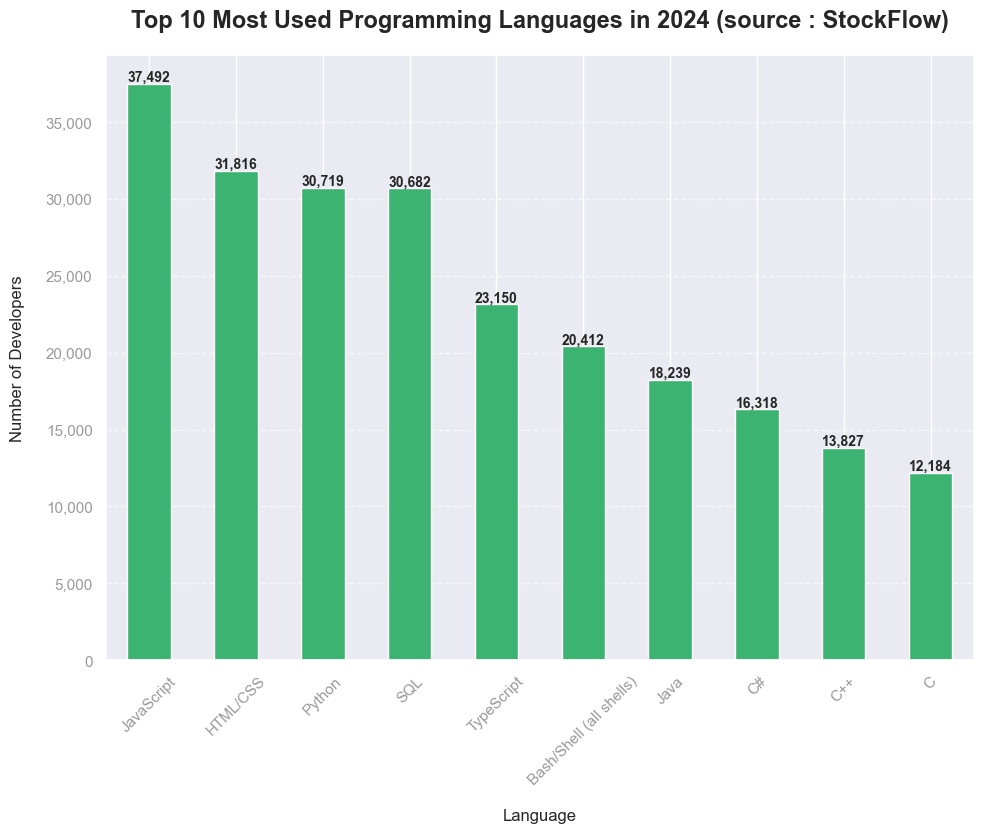

In [15]:
#plot
ax = df_lang_count_2024.plot(kind='bar',
                             color='mediumseagreen',
                            figsize=(10, 8.5))

#title and label setting
plt.title("Top 10 Most Used Programming Languages in 2024 (source : StockFlow)", 
          fontsize = 17,
          fontweight = "bold",
          pad = 20)
plt.ylabel("Number of Developers",
          labelpad = 15)
plt.xlabel("Language",
           labelpad=15)
plt.xticks(rotation=45,
          alpha = 0.8,
          color = "grey")
plt.yticks(color = "grey",
          alpha = 0.8)
plt.grid(axis='y',
         linestyle='--',
         alpha=0.7)

#format xticks with ,
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))


#Add number labels
for p in ax.patches:
    value = int(p.get_height())
    ax.annotate(f'{value:,}', 
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom',
                fontsize=10, fontweight='bold')
    
plt.tight_layout()
plt.show()

# Top 10 Most Used Programming Languages in 2024 (Percentage)

In [16]:
df_2024_only = df_lang_all[df_lang_all['Year'] == 2024]

# Value counts from the full concatenated DataFrame
df_lang_count_2024 = df_2024_only['Language'].value_counts().head(10)

# Total entries for percentage calculation
total_lang_entries_2024 = len(df_2024_only)

In [17]:
#making the percenatge

# Get top 10 language counts
df_lang_count_2024 = df_2024_only['Language'].value_counts().head(10)

# Get total number of entries (for % calculation)
total_lang_entries_2024 = len(df_2024_only)

# Convert counts to percentages
df_lang_pct_2024 = (df_lang_count_2024 / total_lang_entries_2024) * 100

In [18]:
# adding other to spotlight reasoning on top 10
total_mentions_2024 = df_2024_only.shape[0]

# Calculate percentage of all languages
df_lang_pct_2024 = df_2024_only['Language'].value_counts(normalize=True) * 100

# Slice top 10 and calculate "Others"
top_10_pct = df_lang_pct_2024.head(10)
others_pct = 100 - top_10_pct.sum()

# Add "Others" category
df_lang_pct_2024_top10 = top_10_pct.copy()
df_lang_pct_2024_top10["Others"] = others_pct

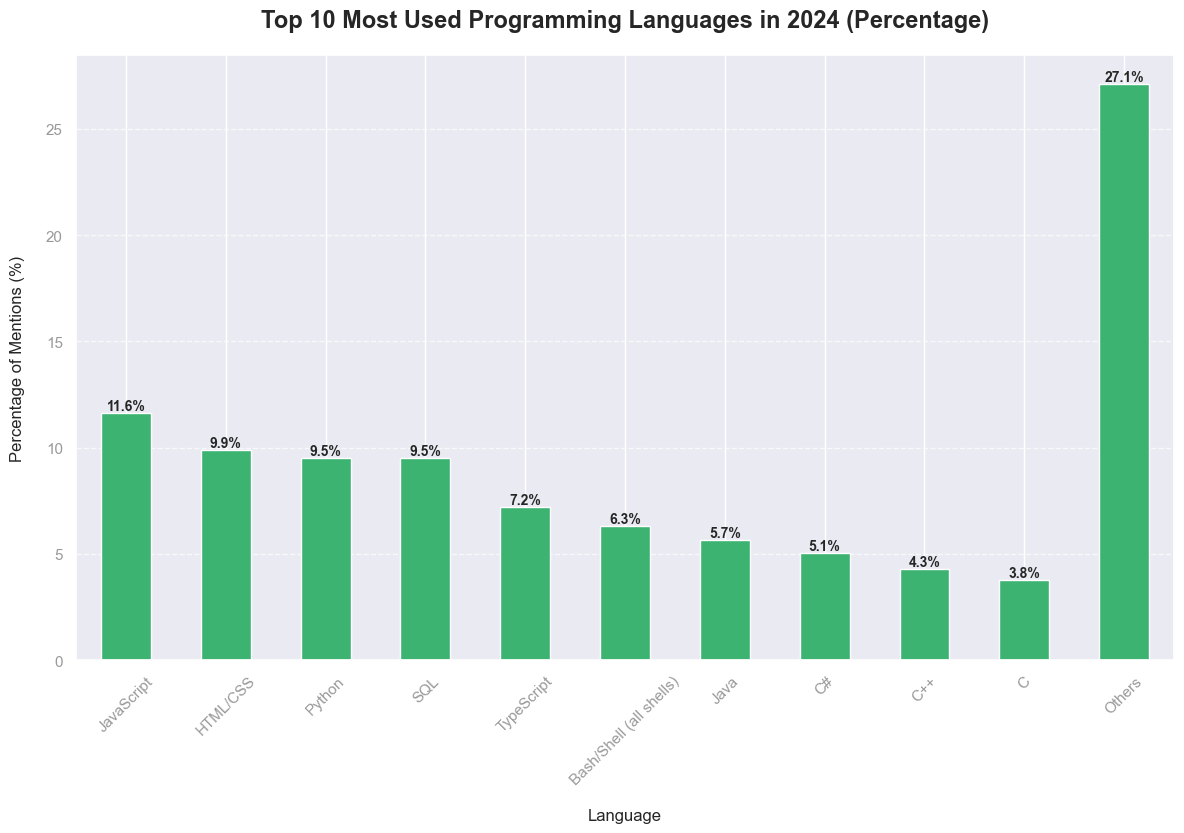

In [19]:
# Plot with "Others" included
ax = df_lang_pct_2024_top10.plot(
    kind='bar',
    color='mediumseagreen',
    figsize=(12, 8.5)
)


# Title and labels
plt.title("Top 10 Most Used Programming Languages in 2024 (Percentage)",
          fontsize=17,
          fontweight="bold",
          pad=20)

plt.ylabel("Percentage of Mentions (%)",
           labelpad=15)
plt.xlabel("Language",
           labelpad=15)

# Tick formatting
plt.xticks(rotation=45,
           alpha=0.8,
           color="grey")
plt.yticks(color="grey",
           alpha=0.8)
plt.grid(axis='y',
         linestyle='--',
         alpha=0.7)

# Add percentage labels
for p in ax.patches:
    value = p.get_height()
    ax.annotate(f'{value:.1f}%', 
                (p.get_x() + p.get_width() / 2, value),
                ha='center', va='bottom',
                fontsize=10, fontweight='bold')
#print and show

plt.tight_layout()
plt.show()


📝 Note: This chart shows the top 10 of 48 unique languages (2024 only).
The remaining 39 languages are grouped under "Others" in the percentage chart.

# Trends in Programming Language Usage (2018–2024)

In [20]:
df_lang_trend = df_lang_all.groupby(['Year', 'Language'])['GlobalRespondentID'].count().reset_index()

In [21]:
df_lang_trend.rename(columns={'GlobalRespondentID': 'Count'}, 
                     inplace=True)

In [22]:
df_lang_pivot = df_lang_trend.pivot(index='Year', columns='Language', values='Count')

In [23]:
yearly_totals = df_lang_pivot.sum(axis=1) 

In [24]:
df_lang_pct_pivot = df_lang_pivot.div(yearly_totals, axis=0) * 100

In [25]:
#top 10 language
df_top_langs_18_24 = df_lang_pct_pivot.loc[2024].sort_values(ascending=False).head(10).index.tolist()

In [26]:
print(df_top_langs_18_24)

['JavaScript', 'HTML/CSS', 'Python', 'SQL', 'TypeScript', 'Bash/Shell (all shells)', 'Java', 'C#', 'C++', 'C']


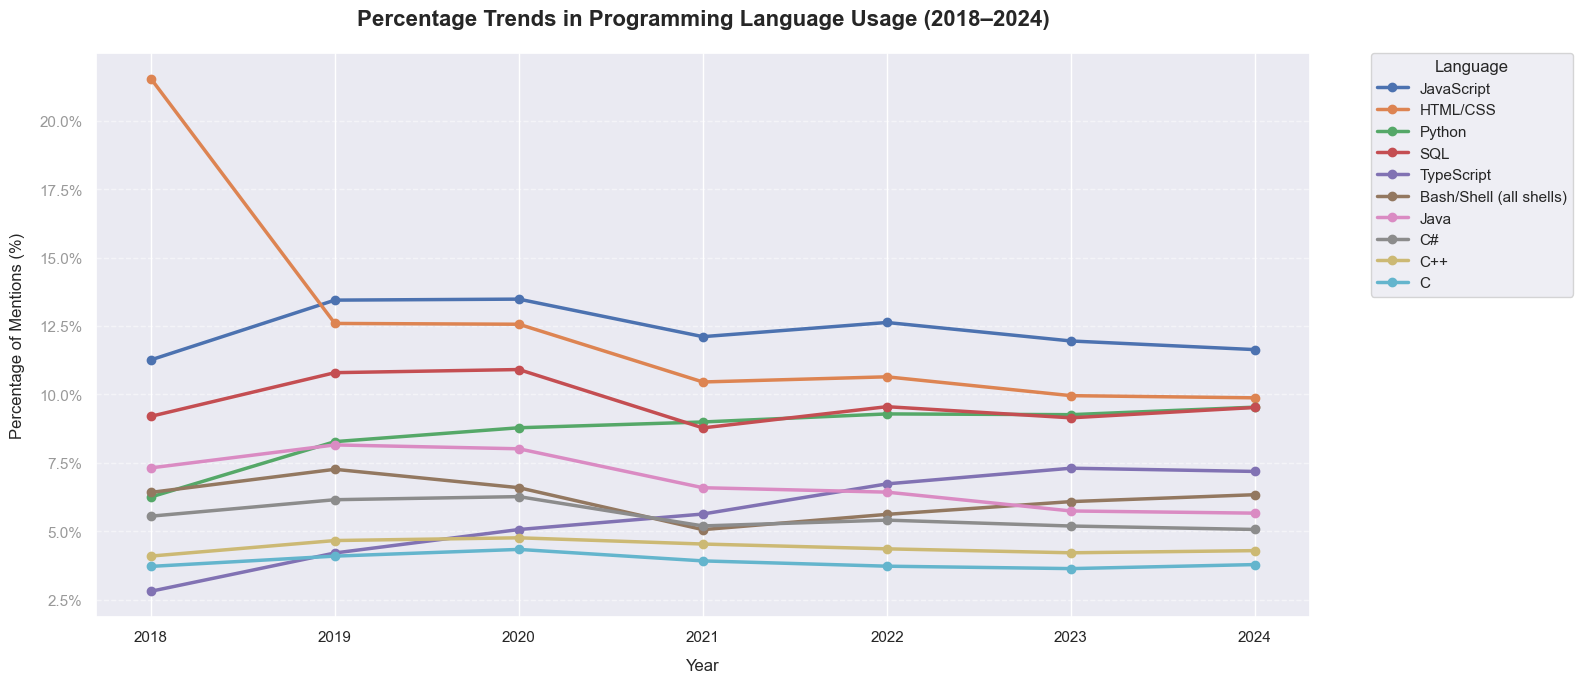

In [28]:
# plot 
plt.figure(figsize=(16, 7))

#plotting each of 10 lang
for lang in df_top_langs_18_24:
    plt.plot(df_lang_pct_pivot.index,           # x-axis: years
             df_lang_pct_pivot[lang],           # y-axis: % of mentions
             label=lang,
             linewidth=2.5,
             marker='o') 

#title and label setting
plt.title("Percentage Trends in Programming Language Usage (2018–2024)",
          fontsize=16,
          fontweight ='bold',
          pad=20)
plt.xlabel("Year",
           labelpad=10)
plt.ylabel("Percentage of Mentions (%)",
           labelpad=10)

#grid and ticks
plt.grid(axis='y',
         linestyle='--',
         alpha=0.5)
plt.xticks(df_lang_pct_pivot.index)  # ensures all years are shown on x-axis
plt.yticks(color="grey",
           alpha=0.8)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:.1f}%')) 

#lagend and layout
plt.legend(title='Language',
           bbox_to_anchor=(1.05, 1),
           loc='upper left',
           borderaxespad=0.)
plt.tight_layout()

#prin and show
plt.show()

# Percentage Trends of the Top 5 Programming Languages from 2018 to 2024

In [29]:
#avg percentage per lang across the year
avg_lang_pct = df_lang_pct_pivot.mean()

In [30]:
top5_langs = avg_lang_pct.sort_values(ascending=False).head(5).index.tolist()

In [31]:
df_top5_pct = df_lang_pct_pivot[top5_langs]

In [32]:
print(df_top5_pct.head())

Language   HTML/CSS  JavaScript        SQL    Python      Java
Year                                                          
2018      21.538788   11.259955   9.197641  6.250978  7.313844
2019      12.591458   13.443434  10.793067  8.273005  8.153596
2020      12.562673   13.479674  10.907140  8.780086  8.011694
2021      10.452594   12.108415   8.775081  8.991323  6.589389
2022      10.641589   12.626522   9.550026  9.285767  6.428127


In [33]:
df_top5_pct_reset = df_top5_pct.reset_index()  # brings 'Year' back as a column

In [34]:
print(df_top5_pct_reset.head())

Language  Year   HTML/CSS  JavaScript        SQL    Python      Java
0         2018  21.538788   11.259955   9.197641  6.250978  7.313844
1         2019  12.591458   13.443434  10.793067  8.273005  8.153596
2         2020  12.562673   13.479674  10.907140  8.780086  8.011694
3         2021  10.452594   12.108415   8.775081  8.991323  6.589389
4         2022  10.641589   12.626522   9.550026  9.285767  6.428127


In [35]:
df_top5_pct_melted = pd.melt(df_top5_pct_reset,
                             id_vars='Year',
                             var_name='Language',
                             value_name='Percentage')

In [36]:
print(df_top5_pct_melted.head())

   Year  Language  Percentage
0  2018  HTML/CSS   21.538788
1  2019  HTML/CSS   12.591458
2  2020  HTML/CSS   12.562673
3  2021  HTML/CSS   10.452594
4  2022  HTML/CSS   10.641589


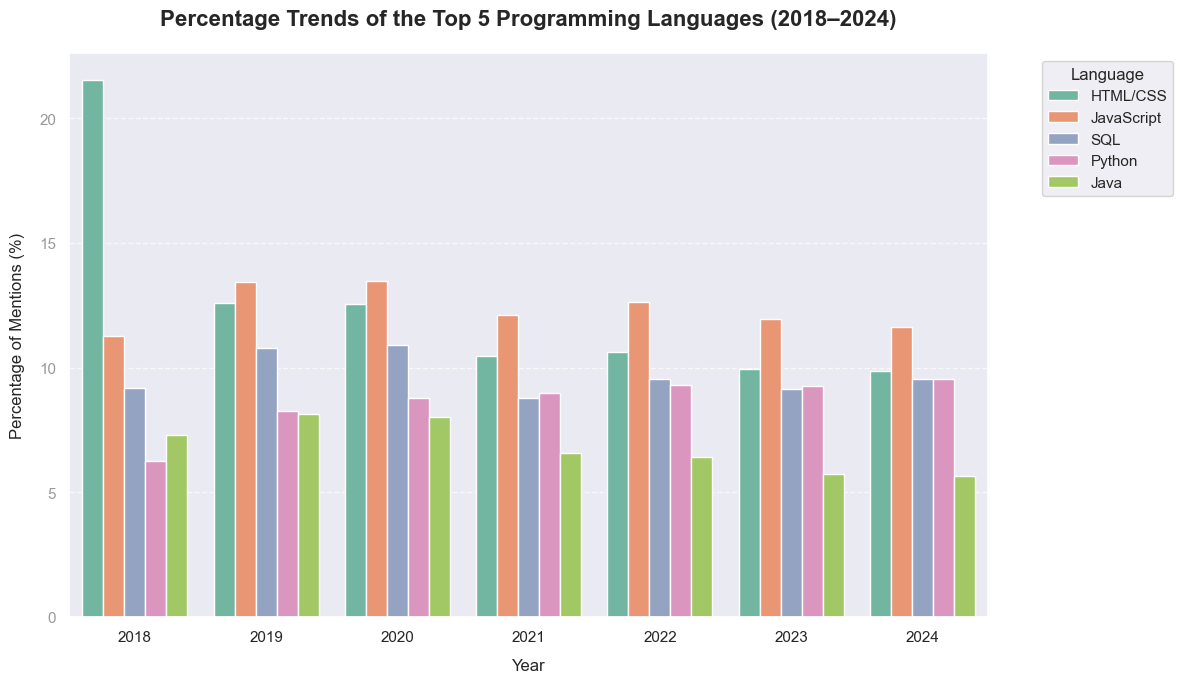

In [37]:
plt.figure(figsize=(12, 7))

# Plot
sns.barplot(data=df_top5_pct_melted,
            x='Year', 
            y='Percentage',
            hue='Language',
            palette='Set2'
           )

# Title & labels
plt.title("Percentage Trends of the Top 5 Programming Languages (2018–2024)", 
          fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Year", labelpad=10)
plt.ylabel("Percentage of Mentions (%)", labelpad=10)

# Grid & styling
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.yticks(color='grey', alpha=0.8)

# Legend
plt.legend(title='Language', 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left')

# Format and show
plt.tight_layout()
plt.show()

In [38]:
#HTML and CSS were historically separate but combined retroactively into HTML/CSS for consistency across years

# 